### Polynomial Regression

Polynomial Regression is an extension of linear regression that models the relationship between the input features and the target variable as an nth-degree polynomial. It's still a form of supervised learning used to predict continuous values, but it allows for curved lines instead of a straight line. This is especially useful when the data shows a nonlinear trend that linear regression cannot capture. The model adds polynomial terms (e.g., x², x³) of the features to capture this curvature. Polynomial regression fits a curve that minimizes the sum of squared errors between actual and predicted values.

* **Use Cases:**
  Use polynomial regression when your data shows a nonlinear relationship between input variables and the target. It's appropriate for problems where a curved line provides a better fit than a straight one, like modeling growth rates, demand curves, or certain physical phenomena. It is also used when you suspect the data has interaction effects or curvature that linear regression cannot represent.

* **Pros:**

  * Captures non-linear relationships effectively
  * Can model more complex patterns without changing the algorithm's core
  * Provides a better fit than linear regression when the true relationship is nonlinear
  * Still relatively interpretable for low-degree polynomials
  * Extends the flexibility of linear models

* **Cons:**

  * Can easily overfit the training data, especially with high-degree polynomials
  * Harder to interpret as the degree increases
  * Sensitive to outliers, just like linear regression
  * May lead to multicollinearity if polynomial features are not managed properly
  * Computationally more expensive than simple linear regression for higher degrees
  * Extrapolation can be highly inaccurate

  | **Best Practice**                                                           |
  | --------------------------------------------------------------------------- |
  | **Check linearity**: Use scatter plots to verify nonlinear relationships.   |
  | **Avoid overfitting**: Start with lower degrees and increase gradually.     |
  | **Scale features**: Use `StandardScaler` or `MinMaxScaler` before training. |
  | **Use cross-validation**: Validate model performance to avoid overfitting.  |
  | **Check residuals**: Ensure residuals are randomly distributed.             |
  | **Consider regularization**: Use **Ridge** or **Lasso** for higher degrees. |
  | **Feature selection**: Select key features before adding polynomial terms.  |
  | **Degree selection**: Use **AIC** or **BIC** to choose the best degree.     |
  | **Monitor multicollinearity**: Use **VIF** to reduce correlation issues.    |



In [22]:
%pip install --quiet pandas numpy matplotlib seaborn scikit-learn


import pandas as pd
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


boston = fetch_openml(name='boston', version=1, as_frame=True)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


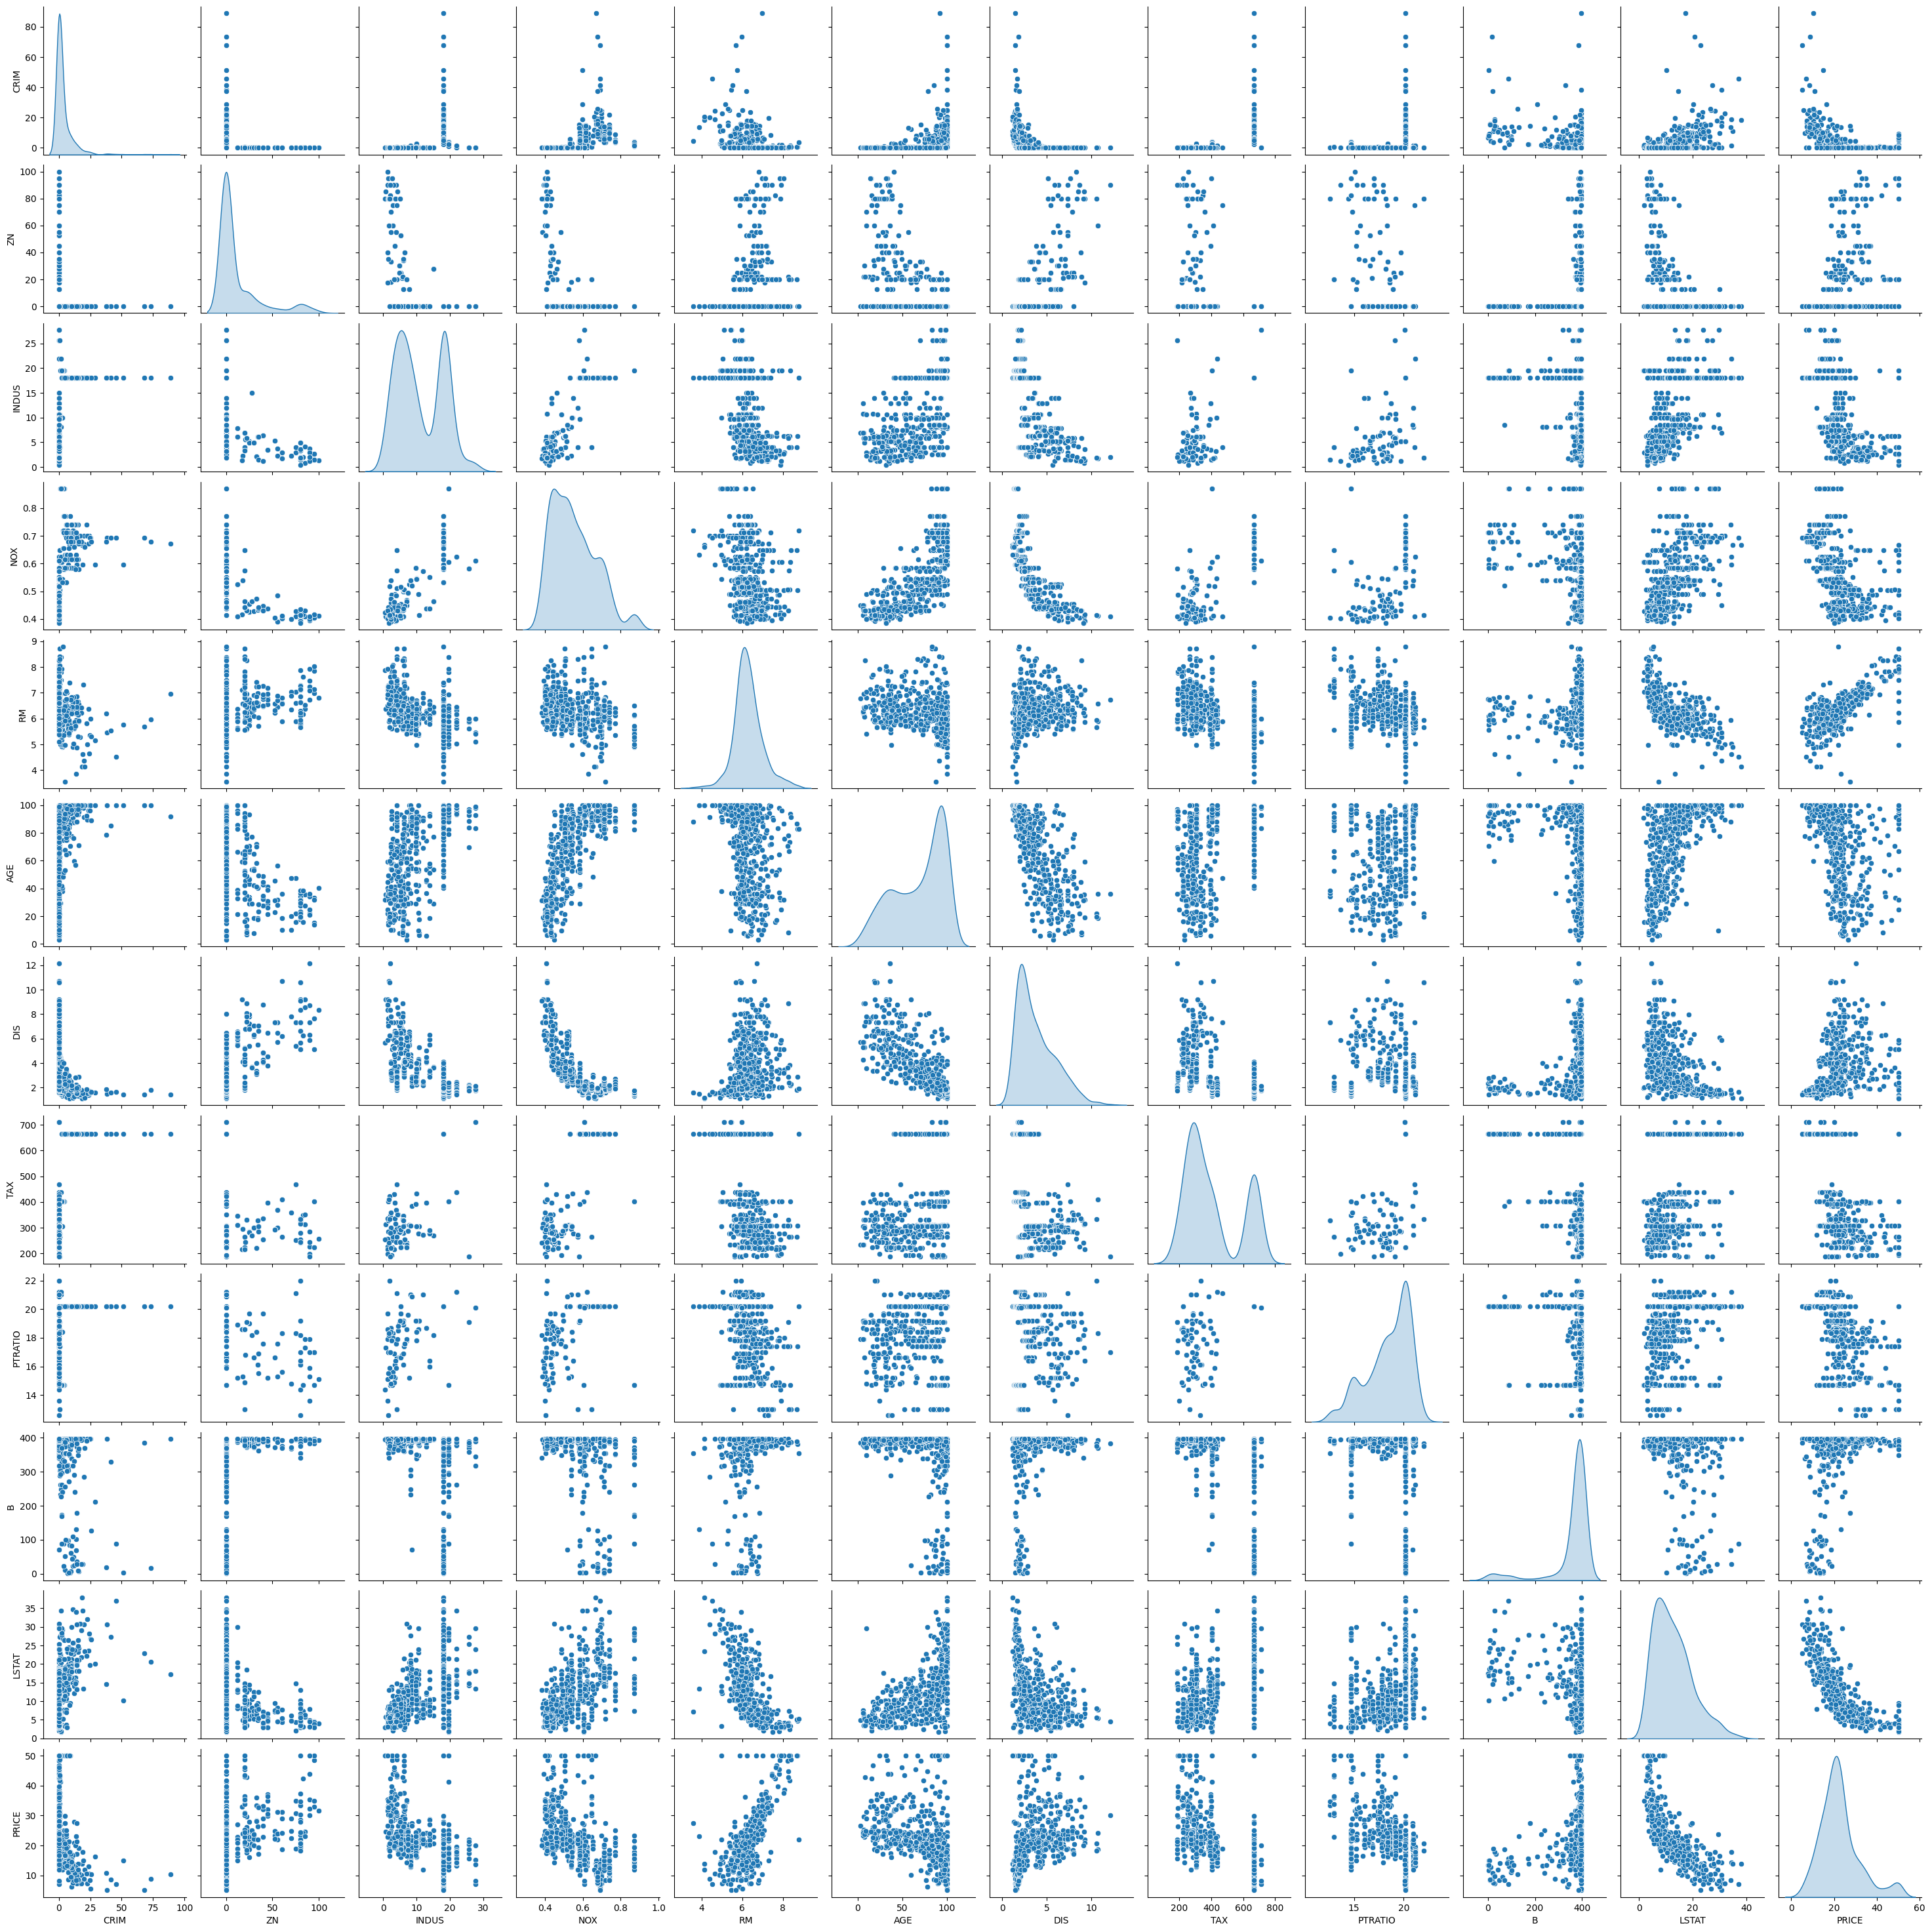

In [ ]:
sns.pairplot(df, diag_kind='kde', height=2.5)
#pair plot of the dataset

In [ ]:

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', LinearRegression())
])
# Create a pipeline with PolynomialFeatures and LinearRegression

param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

X = boston.data.select_dtypes(include=[float, int])  
y = boston.target.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model using GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linreg', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3, 4, 5]}, scoring='r2')

In [19]:
y_pred = grid.predict(X_test)

print("Best Polynomial Degree:", grid.best_params_['poly__degree'])
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Best Polynomial Degree: 2
Mean Squared Error: 14.15470363067348
R² Score: 0.8069824980973865
